<a href="https://colab.research.google.com/github/jugleee/learn2py/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison of Linear Regression algorithms and KNeighbors Regression algorithms**

In [33]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [34]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()  # = Knr = KNeighborsRegressor(n_neighbors = 3)
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [36]:
print(knr.predict([[50]])) # Measure weight for 50cm of the perch

[1000.]


Text(0, 0.5, 'weight')

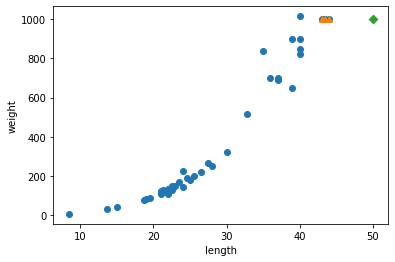

In [47]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='^')
plt.scatter(50, 1000, marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [38]:
print(np.mean(train_target[indexes]))

1000.0


In [39]:
distances, indexes = knr.kneighbors([[200]])

<function matplotlib.pyplot.show>

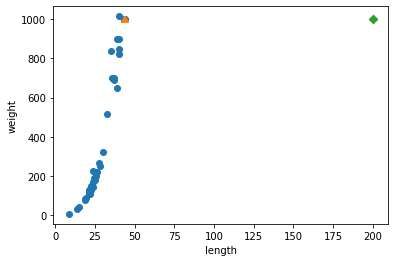

In [48]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='^')
plt.scatter(200, 1000, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [41]:
print(np.mean(train_target[indexes]))

1000.0


In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1179.99020261]


In [50]:
print(lr.coef_, lr.intercept_)  # That results show for linear function(ex. y = a * x + b)
                                # coef_ means short of coefficient(weight)
                                # coef_ & intercept_ are included in ther model parameter

[36.2219374] -631.1066675719071


<function matplotlib.pyplot.show>

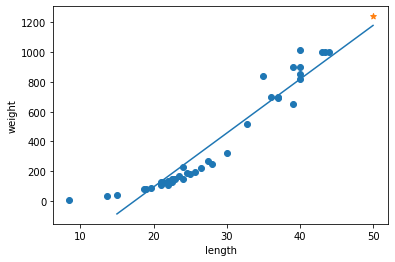

In [51]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [52]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9168296263507826
0.922404851449106


In [55]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [59]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1515.95454091]


In [63]:
print(lr.coef_, lr.intercept_) # weight = 0.92 * length^2 - 17.6 * length + 72.5
                               # polynomial regression

[  0.92996435 -17.62880595] 72.48396912679306


<function matplotlib.pyplot.show>

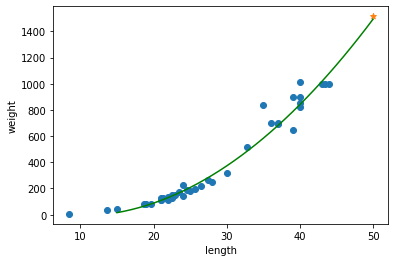

In [80]:
point = np.arange(15, 51)
plt.scatter(train_input, train_target)
plt.plot(point, 0.92 * point**2 - 17.6 * point + 72.5, color = 'green')
plt.scatter(50, 1515, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [84]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))   # as a result, test_score > train_score, therefore this test means underfitting

0.9671155146300727
0.9843394949899568
